In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pickle

In [4]:
# Load the dataset
df = pd.read_csv("C:\\Users\\user\\Downloads\\churn-bigml-20.csv")


In [5]:
# Quick look at the data
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [9]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


In [10]:
# Select only numeric columns
num_df = df.select_dtypes(include=['float64', 'int64'])

In [11]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [12]:
wcss = []
silhouette_scores = []

In [13]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)  # within-cluster sum of squares
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

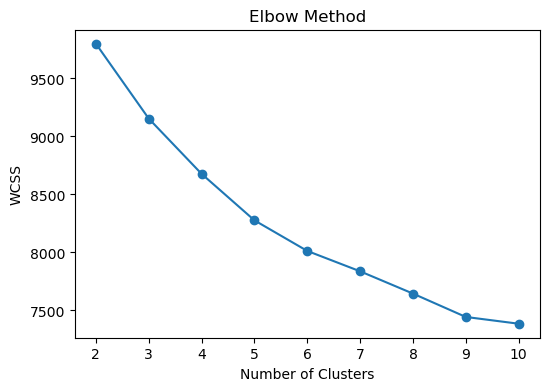

In [14]:
# Plot elbow curve
plt.figure(figsize=(6,4))
plt.plot(range(2, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

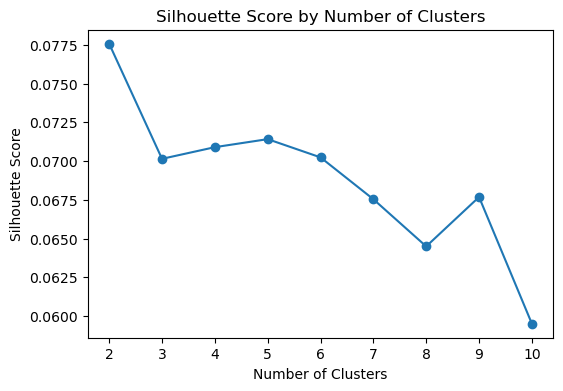

In [15]:
# Plot silhouette scores
plt.figure(figsize=(6,4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Score by Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

From these plots, choose the k where WCSS starts flattening and silhouette is relatively high (often between 2 and 5)

In [26]:
# Encode all object (string) columns
x_encoded = x.copy()
for col in x_encoded.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    x_encoded[col] = le.fit_transform(x_encoded[col])

In [16]:
# Suppose optimal k was 3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [17]:
# Add cluster labels to original data
df['Cluster'] = clusters

In [19]:
x = df.iloc[:, :-1]   # features
y_true = df.iloc[:, -1]

In [23]:
new_col=df.select_dtypes(include=['object']).columns

In [24]:
le=LabelEncoder()
for col in new_col:
    le.fit(df[col])
    df[col]=le.transform(df[col])

In [27]:
num_clusters = 10 #You can experiment with different cluster numbers
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
y_kmeans = kmeans.fit_predict(x_encoded)

In [30]:
# Map cluster IDs to actual labels

def cluster_accuracy(y_true, y_pred):
    labels = np.zeros_like(y_pred)
    for i in range(len(np.unique(y_pred))):
        mask = (y_pred == i)
        labels[mask] = np.bincount(y_true[mask]).argmax()
    return accuracy_score(y_true, labels)

acc = cluster_accuracy(y_true, y_kmeans)
print(f"KMeans Accuracy (after mapping clusters): {acc:.2%}")

KMeans Accuracy (after mapping clusters): 62.22%


In [31]:
# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

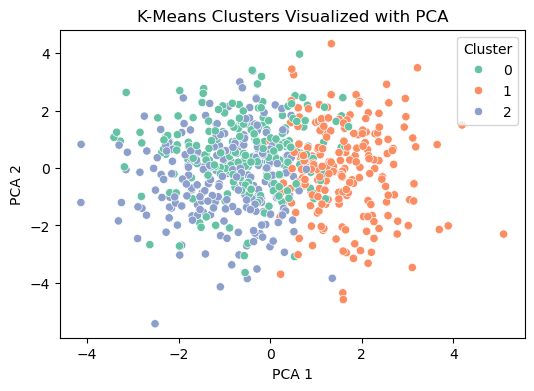

In [32]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=clusters, palette='Set2')
plt.title("K-Means Clusters Visualized with PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Cluster')
plt.show()

In [33]:
# Select the features to cluster on using numbers only
x = df.select_dtypes(include=np.number)

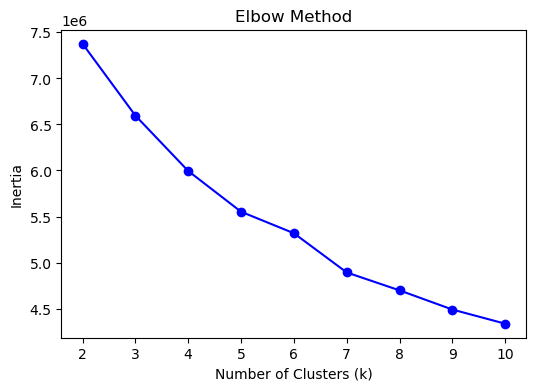

In [35]:
# Elbow Method to find optimal k
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

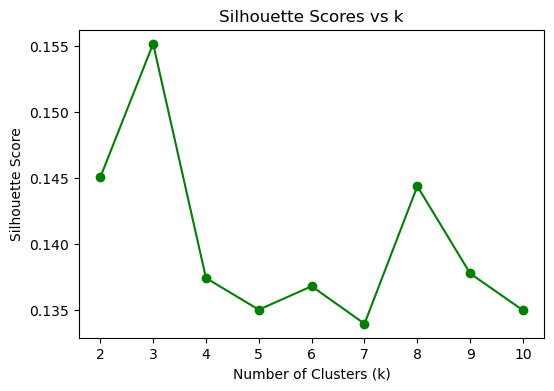

In [37]:
#Silhouette Score for different k
sil_scores = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x)
    sil = silhouette_score(x, labels)
    sil_scores.append(sil)

plt.figure(figsize=(6, 4))
plt.plot(K, sil_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores vs k')
plt.show()


In [39]:
# Choose the best k based on the plots (example using k=3)
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(x)
df['Cluster'] = clusters

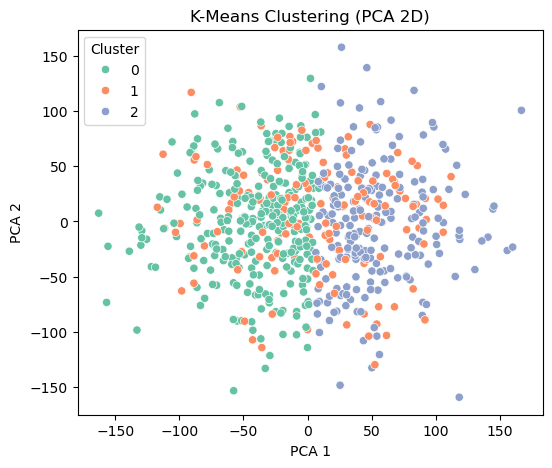

In [41]:
#Visualize clusters using PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

plt.figure(figsize=(6, 5))
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=clusters, palette='Set2')
plt.title('K-Means Clustering (PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

In [42]:
# Interpretation 
# The clusters represent natural groupings within the data based on the selected features.
# Analyze cluster characteristics by checking the mean values of each feature per cluster.

cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

             State  Account length   Area code  International plan  \
Cluster                                                              
0        26.642384      102.983444  412.519868            0.049669   
1        26.657895      101.361842  510.000000            0.111842   
2        25.098592      103.694836  416.976526            0.098592   

         Voice mail plan  Number vmail messages  Total day minutes  \
Cluster                                                              
0               0.311258               9.129139         144.028808   
1               0.263158               8.506579         178.417105   
2               0.258216               7.314554         235.100000   

         Total day calls  Total day charge  Total eve minutes  \
Cluster                                                         
0             102.099338         24.485795         199.808940   
1             100.282895         30.331250         205.050000   
2              99.755869         39.96

In [45]:
# Save the trained KMeans model 
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

K-Means clustering was applied on the standardized numerical features of the churn dataset to identify underlying customer segments. The elbow method and silhouette scores were used to estimate the optimal number of clusters, which was found to be three. The dataset was reduced to two principal components using PCA for visualization, allowing the clusters to be viewed in a 2D space. The resulting clusters revealed distinct groupings of customers based on their usage patterns and service interactions, offering insights that could support targeted marketing strategies and churn reduction initiatives.